## Import libraries

In [29]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

## Load my Dataset

In [87]:
spotify_list=pd.read_csv("Spotify_list.csv")
spotify_list

,Unnamed: 0.1,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0,0.918,0.6090,10,-5.640,0,0.0791,0.09280,0.000,0.1390,0.3040,128.008,audio_features,0CAfXk7DXMnon4gLudAp7J,spotify:track:0CAfXk7DXMnon4gLudAp7J,https://api.spotify.com/v1/tracks/0CAfXk7DXMno...,https://api.spotify.com/v1/audio-analysis/0CAf...,231400,4
1,1,1,0.899,0.7130,6,-2.752,0,0.3660,0.25500,0.000,0.0708,0.7770,90.051,audio_features,7iL6o9tox1zgHpKUfh9vuC,spotify:track:7iL6o9tox1zgHpKUfh9vuC,https://api.spotify.com/v1/tracks/7iL6o9tox1zg...,https://api.spotify.com/v1/audio-analysis/7iL6...,193467,4
2,2,2,0.957,0.7370,2,-4.880,1,0.1150,0.21000,0.000,0.0616,0.9340,107.088,audio_features,5FLctoy4mpCxLJ1QPneTOV,spotify:track:5FLctoy4mpCxLJ1QPneTOV,https://api.spotify.com/v1/tracks/5FLctoy4mpCx...,https://api.spotify.com/v1/audio-analysis/5FLc...,228240,4
3,3,3,0.664,0.7580,2,-6.583,0,0.2100,0.00238,0.000,0.0598,0.7010,99.259,audio_features,0TwBtDAWpkpM3srywFVOV5,spotify:track:0TwBtDAWpkpM3srywFVOV5,https://api.spotify.com/v1/tracks/0TwBtDAWpkpM...,https://api.spotify.com/v1/audio-analysis/0TwB...,235933,4
4,4,4,0.768,0.8640,11,-6.145,1,0.0324,0.10100,0.000,0.1620,0.8910,110.008,audio_features,1Je1IMUlBXcx1Fz0WE7oPT,spotify:track:1Je1IMUlBXcx1Fz0WE7oPT,https://api.spotify.com/v1/tracks/1Je1IMUlBXcx...,https://api.spotify.com/v1/audio-analysis/1Je1...,173027,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567,3159,3159,0.208,0.0714,6,-25.162,1,0.0440,0.92900,0.732,0.2320,0.0600,125.444,audio_features,2JAPN0EiNuHoxO0BneCdaR,spotify:track:2JAPN0EiNuHoxO0BneCdaR,https://api.spotify.com/v1/tracks/2JAPN0EiNuHo...,https://api.spotify.com/v1/audio-analysis/2JAP...,873467,4
9568,3160,3160,0.212,0.1370,9,-19.745,0,0.0532,0.83600,0.302,0.0769,0.0528,75.843,audio_features,1IEEirUosN04V8po6aLZjW,spotify:track:1IEEirUosN04V8po6aLZjW,https://api.spotify.com/v1/tracks/1IEEirUosN04...,https://api.spotify.com/v1/audio-analysis/1IEE...,895213,4
9569,3161,3161,0.179,0.0859,8,-26.923,1,0.0382,0.87600,0.821,0.2220,0.0736,91.996,audio_features,0MEUNc0VdZLE0WpC0usASE,spotify:track:0MEUNc0VdZLE0WpC0usASE,https://api.spotify.com/v1/tracks/0MEUNc0VdZLE...,https://api.spotify.com/v1/audio-analysis/0MEU...,783227,3
9570,3162,3162,0.436,0.2370,1,-20.193,1,0.0557,0.77300,0.656,0.0550,0.2270,125.189,audio_features,2BclmWs5uDzLHLitxDg4P7,spotify:track:2BclmWs5uDzLHLitxDg4P7,https://api.spotify.com/v1/tracks/2BclmWs5uDzL...,https://api.spotify.com/v1/audio-analysis/2Bcl...,498013,4


## Drop Columns and Duplicates

In [88]:
spotify_list=spotify_list.drop_duplicates()

In [89]:
spotify_list=spotify_list.drop(columns=['uri', 'track_href','analysis_url','time_signature' ],axis=1) 
spotify_list=spotify_list.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','type','id' ],axis=1) 
spotify_list

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.918,0.6090,10,-5.640,0,0.0791,0.09280,0.000,0.1390,0.3040,128.008,231400
1,0.899,0.7130,6,-2.752,0,0.3660,0.25500,0.000,0.0708,0.7770,90.051,193467
2,0.957,0.7370,2,-4.880,1,0.1150,0.21000,0.000,0.0616,0.9340,107.088,228240
3,0.664,0.7580,2,-6.583,0,0.2100,0.00238,0.000,0.0598,0.7010,99.259,235933
4,0.768,0.8640,11,-6.145,1,0.0324,0.10100,0.000,0.1620,0.8910,110.008,173027
...,...,...,...,...,...,...,...,...,...,...,...,...
9567,0.208,0.0714,6,-25.162,1,0.0440,0.92900,0.732,0.2320,0.0600,125.444,873467
9568,0.212,0.1370,9,-19.745,0,0.0532,0.83600,0.302,0.0769,0.0528,75.843,895213
9569,0.179,0.0859,8,-26.923,1,0.0382,0.87600,0.821,0.2220,0.0736,91.996,783227
9570,0.436,0.2370,1,-20.193,1,0.0557,0.77300,0.656,0.0550,0.2270,125.189,498013


## Feature Names

In [90]:
feature_names=spotify_list.columns
feature_names

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

## Check the Scale

In [91]:
X=spotify_list
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9571.000000,9.571000e+03
mean,0.525039,0.545610,5.290043,-12.464666,0.591579,0.072050,0.374140,0.431440,0.161330,0.327361,117.252761,3.515455e+05
std,0.232708,0.339014,3.573454,8.830373,0.491567,0.067518,0.411905,0.412041,0.130256,0.261629,27.383302,2.467447e+05
min,0.057800,0.000217,0.000000,-48.573000,0.000000,0.023200,0.000001,0.000000,0.013700,0.000000,36.652000,1.986700e+04
25%,0.326000,0.164000,2.000000,-19.255000,0.000000,0.039800,0.010000,0.000010,0.091000,0.078400,95.178000,2.085345e+05
50%,0.581000,0.656000,6.000000,-8.367000,1.000000,0.048000,0.128000,0.415000,0.112000,0.273000,123.998000,2.778400e+05
75%,0.717000,0.842000,8.000000,-5.928500,1.000000,0.069600,0.902000,0.870000,0.176000,0.522000,134.005500,4.113745e+05
max,0.979000,1.000000,11.000000,-0.776000,1.000000,0.679000,0.996000,0.987000,0.985000,0.979000,210.857000,3.699027e+06


## Scaling/ Normalizing

In [92]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X_scaled_df.head())
print()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1.688734,0.186994,1.318109,0.772903,-1.203517,0.104415,-0.683056,-1.047135,-0.171440,-0.089295,0.392787,-0.486948
1,1.607082,0.493782,0.198686,1.099973,-1.203517,4.353862,-0.289256,-1.047135,-0.695052,1.718700,-0.993422,-0.640690
2,1.856335,0.564580,-0.920738,0.858974,0.830898,0.636152,-0.398510,-1.047135,-0.765686,2.318817,-0.371222,-0.499755
3,0.597180,0.626527,-0.920738,0.666107,-1.203517,2.043253,-0.902585,-1.047135,-0.779506,1.428198,-0.657141,-0.468576
4,1.044115,0.939215,1.597965,0.715711,0.830898,-0.587286,-0.663148,-1.047135,0.005145,2.154454,-0.264582,-0.723533


In [93]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,9.571000e+03,9.571000e+03,9.571000e+03,9.571000e+03,9.571000e+03,9.571000e+03,9.571000e+03,9.571000e+03,9.571000e+03,9.571000e+03,9.571000e+03,9.571000e+03
mean,-1.828347e-15,-3.141939e-16,-2.284941e-16,-6.848560e-16,-2.834543e-16,-2.179615e-17,8.105057e-16,1.137109e-14,-3.657655e-16,1.041668e-15,-7.016294e-16,-2.385773e-16
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-2.007939e+00,-1.608845e+00,-1.480450e+00,-4.089320e+00,-1.203517e+00,-7.235526e-01,-9.083595e-01,-1.047135e+00,-1.133444e+00,-1.251304e+00,-2.943581e+00,-1.344288e+00
25%,-8.553610e-01,-1.125704e+00,-9.207379e-01,-7.690150e-01,-1.203517e+00,-4.776802e-01,-8.840841e-01,-1.047111e+00,-5.399649e-01,-9.516282e-01,-8.061816e-01,-5.796214e-01
50%,2.404907e-01,3.256389e-01,1.986857e-01,4.640664e-01,8.308984e-01,-3.562251e-01,-5.975953e-01,-3.990104e-02,-3.787352e-01,-2.077893e-01,2.463396e-01,-2.987273e-01
75%,8.249450e-01,8.743174e-01,7.583975e-01,7.402300e-01,8.308984e-01,-3.629467e-02,1.281577e+00,1.064415e+00,1.126314e-01,7.439882e-01,6.118186e-01,2.424860e-01
max,1.950879e+00,1.340399e+00,1.597965e+00,1.323758e+00,8.308984e-01,8.989891e+00,1.509797e+00,1.348383e+00,6.323813e+00,2.490825e+00,3.418475e+00,1.356729e+01


## Clustering with K-Means

In [94]:
kmeans = KMeans(n_clusters=11, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=11, random_state=1234)

In [95]:
kmeans.labels_

array([ 0,  5,  4, ..., 10,  8,  1], dtype=int32)

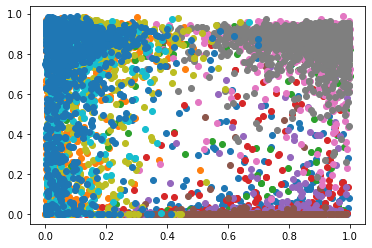

In [96]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 7])
    # show the plot
pyplot.show()

## How many observations in each cluster

In [97]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     1418
1      976
2      344
3     1098
4      936
5      540
6      877
7     1233
8      748
9      320
10    1081
dtype: int64

## Check in which cluster did each song fall

In [98]:
X["cluster"] = clusters
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.918,0.6090,10,-5.640,0,0.0791,0.09280,0.000,0.1390,0.3040,128.008,231400,0
1,0.899,0.7130,6,-2.752,0,0.3660,0.25500,0.000,0.0708,0.7770,90.051,193467,5
2,0.957,0.7370,2,-4.880,1,0.1150,0.21000,0.000,0.0616,0.9340,107.088,228240,4
3,0.664,0.7580,2,-6.583,0,0.2100,0.00238,0.000,0.0598,0.7010,99.259,235933,5
4,0.768,0.8640,11,-6.145,1,0.0324,0.10100,0.000,0.1620,0.8910,110.008,173027,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567,0.208,0.0714,6,-25.162,1,0.0440,0.92900,0.732,0.2320,0.0600,125.444,873467,9
9568,0.212,0.1370,9,-19.745,0,0.0532,0.83600,0.302,0.0769,0.0528,75.843,895213,1
9569,0.179,0.0859,8,-26.923,1,0.0382,0.87600,0.821,0.2220,0.0736,91.996,783227,10
9570,0.436,0.2370,1,-20.193,1,0.0557,0.77300,0.656,0.0550,0.2270,125.189,498013,8


In [99]:
spotify_list=pd.read_csv("Spotify_list.csv")
spotify_list

,Unnamed: 0.1,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0,0.918,0.6090,10,-5.640,0,0.0791,0.09280,0.000,0.1390,0.3040,128.008,audio_features,0CAfXk7DXMnon4gLudAp7J,spotify:track:0CAfXk7DXMnon4gLudAp7J,https://api.spotify.com/v1/tracks/0CAfXk7DXMno...,https://api.spotify.com/v1/audio-analysis/0CAf...,231400,4
1,1,1,0.899,0.7130,6,-2.752,0,0.3660,0.25500,0.000,0.0708,0.7770,90.051,audio_features,7iL6o9tox1zgHpKUfh9vuC,spotify:track:7iL6o9tox1zgHpKUfh9vuC,https://api.spotify.com/v1/tracks/7iL6o9tox1zg...,https://api.spotify.com/v1/audio-analysis/7iL6...,193467,4
2,2,2,0.957,0.7370,2,-4.880,1,0.1150,0.21000,0.000,0.0616,0.9340,107.088,audio_features,5FLctoy4mpCxLJ1QPneTOV,spotify:track:5FLctoy4mpCxLJ1QPneTOV,https://api.spotify.com/v1/tracks/5FLctoy4mpCx...,https://api.spotify.com/v1/audio-analysis/5FLc...,228240,4
3,3,3,0.664,0.7580,2,-6.583,0,0.2100,0.00238,0.000,0.0598,0.7010,99.259,audio_features,0TwBtDAWpkpM3srywFVOV5,spotify:track:0TwBtDAWpkpM3srywFVOV5,https://api.spotify.com/v1/tracks/0TwBtDAWpkpM...,https://api.spotify.com/v1/audio-analysis/0TwB...,235933,4
4,4,4,0.768,0.8640,11,-6.145,1,0.0324,0.10100,0.000,0.1620,0.8910,110.008,audio_features,1Je1IMUlBXcx1Fz0WE7oPT,spotify:track:1Je1IMUlBXcx1Fz0WE7oPT,https://api.spotify.com/v1/tracks/1Je1IMUlBXcx...,https://api.spotify.com/v1/audio-analysis/1Je1...,173027,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567,3159,3159,0.208,0.0714,6,-25.162,1,0.0440,0.92900,0.732,0.2320,0.0600,125.444,audio_features,2JAPN0EiNuHoxO0BneCdaR,spotify:track:2JAPN0EiNuHoxO0BneCdaR,https://api.spotify.com/v1/tracks/2JAPN0EiNuHo...,https://api.spotify.com/v1/audio-analysis/2JAP...,873467,4
9568,3160,3160,0.212,0.1370,9,-19.745,0,0.0532,0.83600,0.302,0.0769,0.0528,75.843,audio_features,1IEEirUosN04V8po6aLZjW,spotify:track:1IEEirUosN04V8po6aLZjW,https://api.spotify.com/v1/tracks/1IEEirUosN04...,https://api.spotify.com/v1/audio-analysis/1IEE...,895213,4
9569,3161,3161,0.179,0.0859,8,-26.923,1,0.0382,0.87600,0.821,0.2220,0.0736,91.996,audio_features,0MEUNc0VdZLE0WpC0usASE,spotify:track:0MEUNc0VdZLE0WpC0usASE,https://api.spotify.com/v1/tracks/0MEUNc0VdZLE...,https://api.spotify.com/v1/audio-analysis/0MEU...,783227,3
9570,3162,3162,0.436,0.2370,1,-20.193,1,0.0557,0.77300,0.656,0.0550,0.2270,125.189,audio_features,2BclmWs5uDzLHLitxDg4P7,spotify:track:2BclmWs5uDzLHLitxDg4P7,https://api.spotify.com/v1/tracks/2BclmWs5uDzL...,https://api.spotify.com/v1/audio-analysis/2Bcl...,498013,4


In [101]:
X['id']=spotify_list['id']
final_list= pd.concat([X_scaled_df, X['id'], X['cluster']], axis = 1)
final_list

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,id,cluster
0,1.688734,0.186994,1.318109,0.772903,-1.203517,0.104415,-0.683056,-1.047135,-0.171440,-0.089295,0.392787,-0.486948,0CAfXk7DXMnon4gLudAp7J,0.0
1,1.607082,0.493782,0.198686,1.099973,-1.203517,4.353862,-0.289256,-1.047135,-0.695052,1.718700,-0.993422,-0.640690,7iL6o9tox1zgHpKUfh9vuC,5.0
2,1.856335,0.564580,-0.920738,0.858974,0.830898,0.636152,-0.398510,-1.047135,-0.765686,2.318817,-0.371222,-0.499755,5FLctoy4mpCxLJ1QPneTOV,4.0
3,0.597180,0.626527,-0.920738,0.666107,-1.203517,2.043253,-0.902585,-1.047135,-0.779506,1.428198,-0.657141,-0.468576,0TwBtDAWpkpM3srywFVOV5,5.0
4,1.044115,0.939215,1.597965,0.715711,0.830898,-0.587286,-0.663148,-1.047135,0.005145,2.154454,-0.264582,-0.723533,1Je1IMUlBXcx1Fz0WE7oPT,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567,-1.345271,-1.205351,1.038253,-0.824508,-1.203517,-0.279205,1.121338,-0.314160,-0.648219,-1.049482,-1.512306,2.203476,2JAPN0EiNuHoxO0BneCdaR,9.0
9568,-1.487087,-1.356090,0.758397,-1.637427,0.830898,-0.501379,1.218453,0.945489,0.465801,-0.969976,-0.922390,1.749598,1IEEirUosN04V8po6aLZjW,1.0
9569,-0.382641,-0.910363,-1.200594,-0.875245,0.830898,-0.242176,0.968382,0.545023,-0.816359,-0.383620,0.289836,0.593630,0MEUNc0VdZLE0WpC0usASE,10.0
9570,-1.530062,-1.471136,1.038253,-1.089856,-1.203517,-0.418434,1.410254,0.729480,0.020500,-1.106818,-0.594837,-0.176599,2BclmWs5uDzLHLitxDg4P7,8.0


In [103]:
final_list.dropna(inplace=True)

## Try with another parameter

In [104]:
kmeans.inertia_

40807.61692383225

In [105]:
kmeans2 = KMeans(n_clusters=5,
                init="k-means++",
                n_init=5, 
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

56325.288998894575


## Choosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

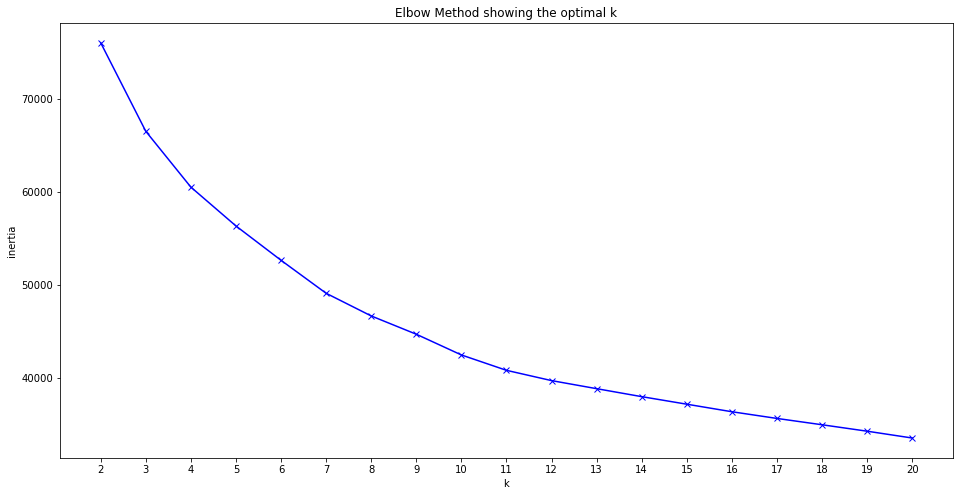

In [106]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## Load the Hot 100

In [74]:
hot_hundred=pd.read_csv("Top Hundred Songs.csv")
hot_hundred

,Unnamed: 0,artist,songs
0,0,harry styles,as it was
1,1,jack harlow,first class
2,2,glass animals,heat waves
3,3,latto,big energy
4,4,imagine dragons x jid,enemy
...,...,...,...
95,95,gunna featuring drake,p power
96,96,yeat,money so big
97,97,coi leray & nicki minaj,blick blick!
98,98,bailey zimmerman,fall in love


In [75]:
songs=['as it was', 'first class', 'heat waves', 'big energy', 'enemy', 'stay', "don't think jesus", 'woman', 'super gremlin', 'ghost', 'thats what i want', 'bad habits', 'abcdefu', 'shivers', 'cold heart (pnau remix)', 'easy on me', 'need to know', 'save your tears', 'one right now', 'in a minute', 'levitating', "'til you can't", 'industry baby', 'mamiii', 'bam bam', 'hrs and hrs', "we don't talk about bruno", 'right on', 'never say never', "doin' this", 'wasted on you', 'aa', 'good 4 u', 'sweetest pie', 'fingers crossed', 'i hate u', 'boyfriend', 'to the moon!', 'you right', 'numb little bug', 'fancy like', 'sand in my boots', 'what happened to virgil', 'pushin p', 'beers on me', 'the motto', "she's all i wanna be", "when you're gone", 'buy dirt', 'about damn time', 'shake it', 'light switch', 'if i was a cowboy', 'peru', 'flowers', 'nail tech', 'freaky deaky', '23', 'trouble with a heartbreak', 'broadway girls', 'heart on fire', 'no love', 'surface pressure', 'slow down summer', 'flower shops', 'never wanted to be that girl', 'me or sum', 'ahhh ha', 'give heaven some hell', 'handsomer', 'envolver', 'do we have a problem?', 'get into it (yuh)', 'rumors', 'take my name', 'damn strait', 'circles around this town', 'in my head', 'nobody like u', 'soy el unico', 'i love you so', 'come back as a country boy', 'gine', 'city of gods', 'complete mess', 'leave you alone', 'bones', 'banking on me', 'she likes it', 'pressure', 'desesperados', 'over', 'the family madrigal', 'hate our love', 'dos oruguitas', 'p power', 'money so big', 'blick blick!', 'fall in love', 'x ultima vez']
songs

['as it was',
 'first class',
 'heat waves',
 'big energy',
 'enemy',
 'stay',
 "don't think jesus",
 'woman',
 'super gremlin',
 'ghost',
 'thats what i want',
 'bad habits',
 'abcdefu',
 'shivers',
 'cold heart (pnau remix)',
 'easy on me',
 'need to know',
 'save your tears',
 'one right now',
 'in a minute',
 'levitating',
 "'til you can't",
 'industry baby',
 'mamiii',
 'bam bam',
 'hrs and hrs',
 "we don't talk about bruno",
 'right on',
 'never say never',
 "doin' this",
 'wasted on you',
 'aa',
 'good 4 u',
 'sweetest pie',
 'fingers crossed',
 'i hate u',
 'boyfriend',
 'to the moon!',
 'you right',
 'numb little bug',
 'fancy like',
 'sand in my boots',
 'what happened to virgil',
 'pushin p',
 'beers on me',
 'the motto',
 "she's all i wanna be",
 "when you're gone",
 'buy dirt',
 'about damn time',
 'shake it',
 'light switch',
 'if i was a cowboy',
 'peru',
 'flowers',
 'nail tech',
 'freaky deaky',
 '23',
 'trouble with a heartbreak',
 'broadway girls',
 'heart on fire',


In [76]:
import pandas as pd
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import config
sp=spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=config.client_id,
                                                         client_secret= config.client_secret))

import random 
import difflib
from IPython.display import IFrame

## Song Recommender Functions

In [107]:
import pandas as pd
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import config
sp=spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=config.client_id,
                                                         client_secret= config.client_secret))

import random 
import difflib
from IPython.display import IFrame


def song_recommender():
    n=1
    
    user_input=input("Type a song name: ")
    if hot_hundred.songs.str.contains(user_input, na = False, case = False).any()==True:
        print ("You want to listen to " + random.choice(hot_hundred.songs) + " from the Hot 100?")
        
    else:
        if difflib.get_close_matches(user_input, songs, n)!=[]:
             print("Did you mean "+ difflib.get_close_matches(user_input.lower(), songs, n)[0] + "?") 
             response=input("").lower()
             if response == 'yes':
                print("You want to listen to " + random.choice(hot_hundred.songs) + " from the Hot 100?")
             else:
                spoti_search=sp.search(q=user_input, limit=1, market="GB")
                features=sp.audio_features(spoti_search["tracks"]["items"][0]["id"])
                df=pd.json_normalize(features)
                dropping=df.drop(columns=['type','id','uri', 'track_href','analysis_url','time_signature'],axis=1) 
                scaled=scaler.transform(dropping)
                cluster=kmeans.predict(scaled)
                predict_cluster=final_list[final_list['cluster']==cluster[0]]
                recom = predict_cluster.sample()
                track_id=recom["id"].values[0]
                display=IFrame(src="https://open.spotify.com/embed/track/"+track_id, width="320", height="80", frameborder="0",allowtransparency="true",
                allow="encrypted-media",)
                return display
        else:    
            spoti_search=sp.search(q=user_input, limit=1, market="GB")
            features=sp.audio_features(spoti_search["tracks"]["items"][0]["id"])
            df=pd.json_normalize(features)
            dropping=df.drop(columns=['type','id','uri', 'track_href','analysis_url','time_signature'],axis=1) 
            scaled=scaler.transform(dropping)
            cluster=kmeans.predict(scaled)
            predict_cluster=final_list[final_list['cluster']==cluster[0]]
            recom = predict_cluster.sample()
            track_id=recom["id"].values[0]
            display=IFrame(src="https://open.spotify.com/embed/track/"+track_id, width="320", height="80", frameborder="0",allowtransparency="true",
            allow="encrypted-media",)
            return display
  

In [109]:
def song_recommender():
    n=1
    
    user_input=input("Type a song name: ")
    if hot_hundred.songs.str.contains(user_input, na = False, case = False).any()==True:
        print ("You want to listen to " + random.choice(hot_hundred.songs) + " from the Hot 100?")
        
    else:
        if difflib.get_close_matches(user_input, songs, n)!=[]:
             print("Did you mean "+ difflib.get_close_matches(user_input.lower(), songs, n)[0] + "?") 
             response=input("").lower()
             if response == 'yes':
                print("You want to listen to " + random.choice(hot_hundred.songs) + " from the Hot 100?")
             else:
                spoti_search=sp.search(q=user_input, limit=1, market="GB")
                features=sp.audio_features(spoti_search["tracks"]["items"][0]["id"])
                df=pd.json_normalize(features)
                dropping=df.drop(columns=['type','id','uri', 'track_href','analysis_url','time_signature'],axis=1) 
                scaled=scaler.transform(dropping)
                cluster=kmeans.predict(scaled)
                predict_cluster=final_list[final_list['cluster']==cluster[0]]
                recom = predict_cluster.sample()
                track_id=recom["id"].values[0]
                display=IFrame(src="https://open.spotify.com/embed/track/"+track_id, width="320", height="80", frameborder="0",allowtransparency="true",
                allow="encrypted-media",)
                return display
        else:    
            spoti_search=sp.search(q=user_input, limit=1, market="GB")
            features=sp.audio_features(spoti_search["tracks"]["items"][0]["id"])
            df=pd.json_normalize(features)
            dropping=df.drop(columns=['type','id','uri', 'track_href','analysis_url','time_signature'],axis=1) 
            scaled=scaler.transform(dropping)
            
            return scaled

In [108]:
song_recommender()

Type a song name: hello


/Users/christineiskander/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


ValueError: a must be greater than 0 unless no samples are taken

In [110]:
final_list.tempo.min()

-2.943581169021784